In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('ph-data.csv')
import pickle

In [2]:
df.head()

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


In [3]:
import pandas as pd
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, balanced_accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

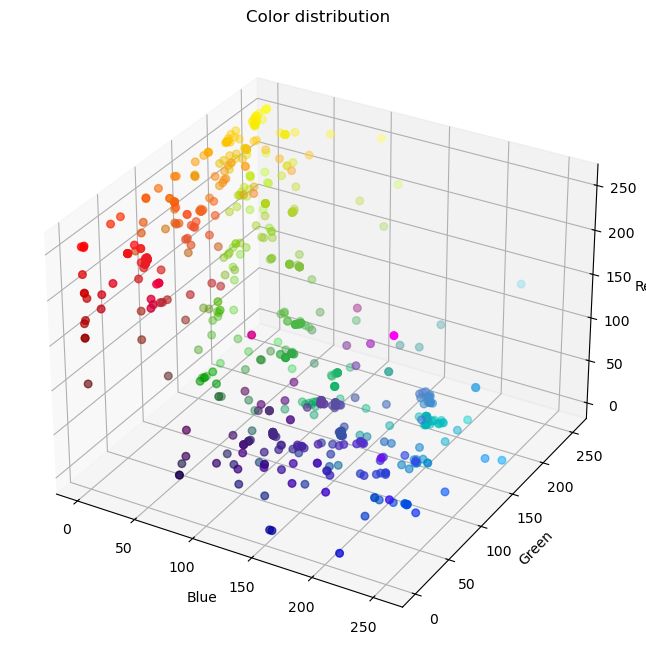

In [4]:
colors = np.array([df.red, df.green, df.blue]).T
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = df.blue
y = df.green
z = df.red
ax.scatter(x, y, z, c=colors/255.0, s=30)
ax.set_title("Color distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
plt.show()


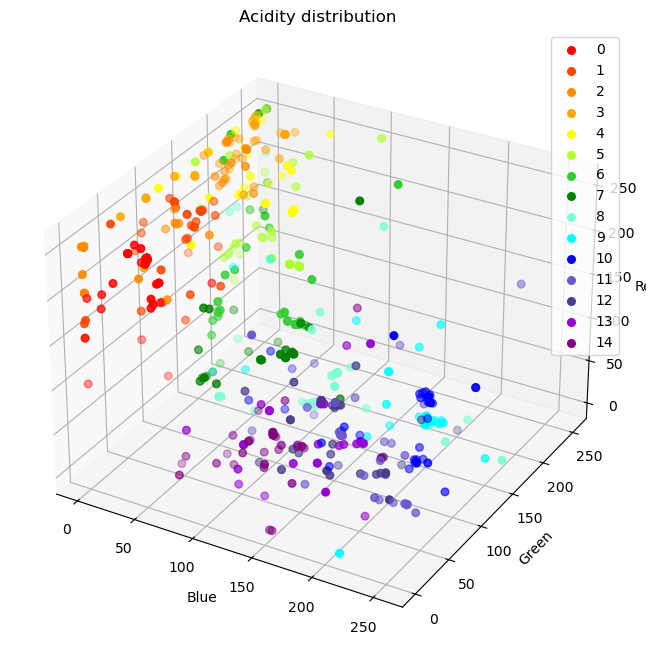

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
labels = range(0, 15)
ph_colors = ['red','orangered', 'darkorange', 'orange', 'yellow', 'greenyellow', 'limegreen', 'green', 'aquamarine', 'aqua', 'blue', 'slateblue', 'darkslateblue', 'darkviolet', 'purple']
for l in labels:
    x = df[df['label'] == l].blue
    y = df[df['label'] == l].green
    z = df[df['label'] == l].red
    ax.scatter(x, y, z, label=l, c=ph_colors[l], s=30)
ax.set_title("Acidity distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
ax.legend(loc='best')
plt.show()

In [6]:
df.isnull().sum()




blue     0
green    0
red      0
label    0
dtype: int64

In [7]:
def determine_acidity_3_group(df):
    if df['label'] == 7:
        val = 'neutral'
    elif df['label'] > 7:
        val = 'alkali'
    elif df['label'] < 7:
        val = 'acid'
    return val


In [8]:
def determine_acidity_5_group(df):
    if df['label'] == 7:
        val = 'neutral'
    elif df['label'] > 11:
        val = 'strong_alkali'
    elif df['label'] < 3:
        val = 'strong_acid'
    elif 11 >= df['label'] > 7:
        val = 'alkali'
    elif 3 <= df['label'] < 7:
        val = 'acid'    
    return val

In [9]:
df['acidity_3_group'] = df.apply(determine_acidity_3_group, axis=1)
df['acidity_5_group'] = df.apply(determine_acidity_5_group, axis=1)
df.head()

,blue,green,red,label,acidity_3_group,acidity_5_group
0,36,27,231,0,acid,strong_acid
1,36,84,250,1,acid,strong_acid
2,37,164,255,2,acid,strong_acid
3,22,205,255,3,acid,acid
4,38,223,221,4,acid,acid


<Axes: xlabel='label', ylabel='count'>

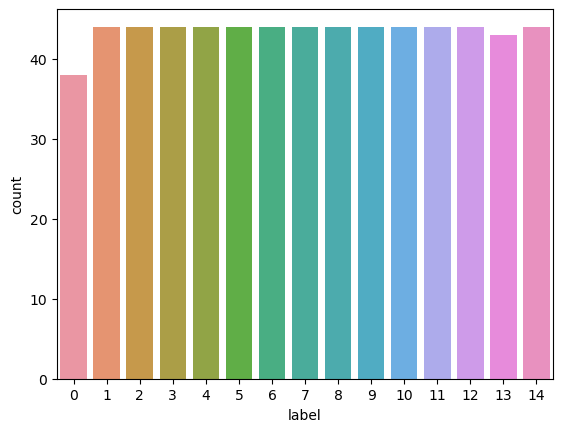

In [10]:
sb.countplot(x='label', data=df)

<Axes: xlabel='acidity_3_group', ylabel='count'>

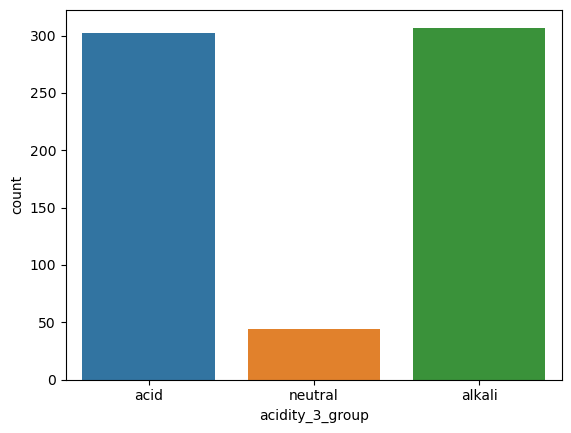

In [11]:
sb.countplot(x='acidity_3_group', data=df)

<Axes: xlabel='acidity_5_group', ylabel='count'>

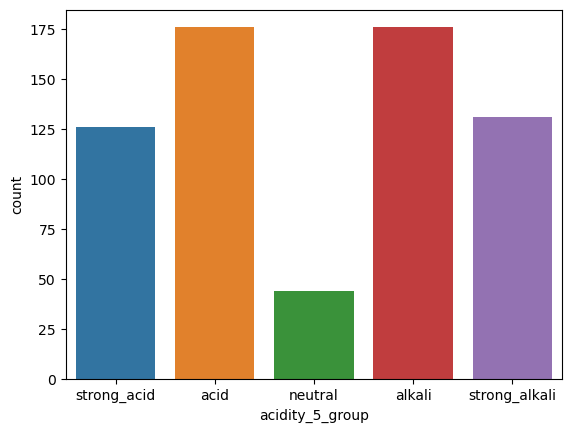

In [12]:
sb.countplot(x='acidity_5_group', data=df)

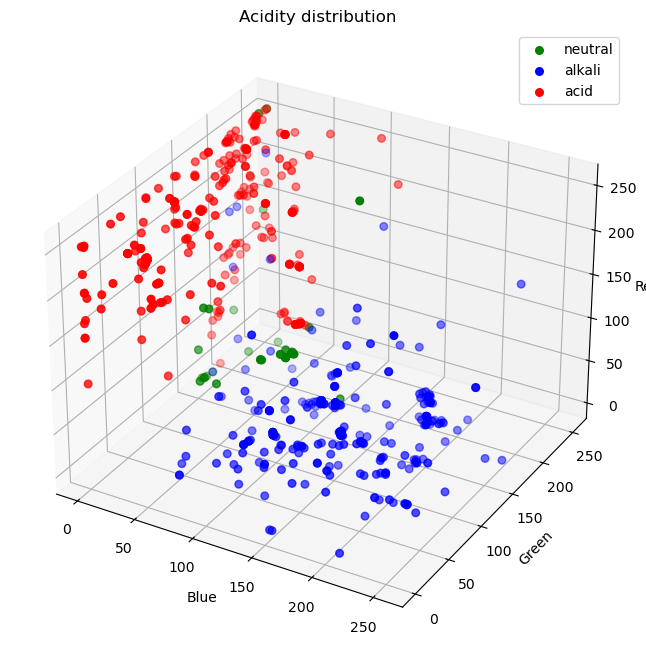

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
labels = ['neutral', 'alkali', 'acid']
ph_colors = ['green','blue', 'red']
for l in range(0, 3):
    x = df[df['acidity_3_group'] == labels[l]].blue
    y = df[df['acidity_3_group'] == labels[l]].green
    z = df[df['acidity_3_group'] == labels[l]].red
    ax.scatter(x, y, z, label=labels[l], c=ph_colors[l], s=30)
ax.set_title("Acidity distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
ax.legend(loc='best')
plt.show()

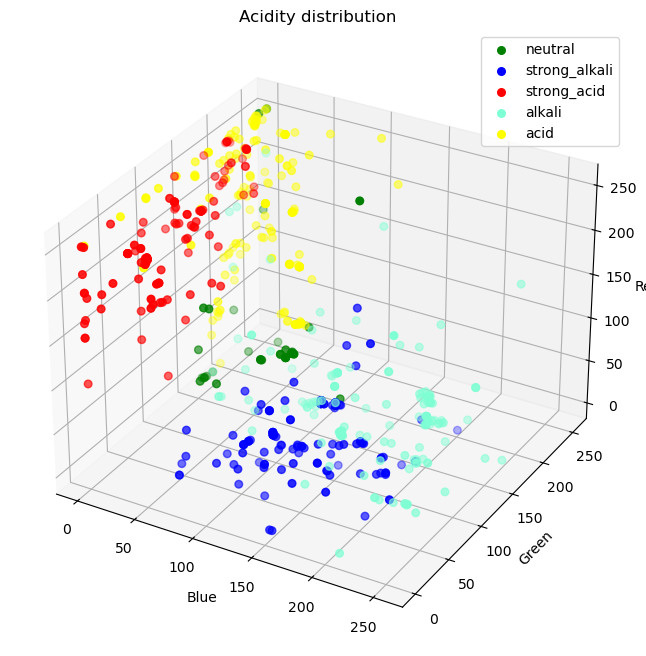

In [14]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
labels = ['neutral', 'strong_alkali', 'strong_acid', 'alkali', 'acid']
ph_colors = ['green','blue', 'red', 'aquamarine', 'yellow']
for l in range(0, 5):
    x = df[df['acidity_5_group'] == labels[l]].blue
    y = df[df['acidity_5_group'] == labels[l]].green
    z = df[df['acidity_5_group'] == labels[l]].red
    ax.scatter(x, y, z, label=labels[l], c=ph_colors[l], s=30)
ax.set_title("Acidity distribution")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
ax.legend(loc='best')
plt.show()


In [15]:
df_result_1 = df['label']
df_result_2 = df['acidity_3_group']
df_result_3 = df['acidity_5_group']
df_inputs = df.drop(['label', 'acidity_3_group', 'acidity_5_group'], axis=1)
X_train, X_test, y_train_1, y_test_1 = train_test_split(df_inputs, df_result_1, test_size=0.25, random_state=1)
y_train_2 = df['acidity_3_group'].iloc[y_train_1.index]
y_train_3 = df['acidity_5_group'].iloc[y_train_1.index]
y_test_2 = df['acidity_3_group'].iloc[y_test_1.index]
y_test_3 = df['acidity_5_group'].iloc[y_test_1.index]

In [16]:
def best_model(X_train, y_train):
    
    param_distribution_log_reg = {'penalty':['l2', 'none'], 'fit_intercept':[True,False], 'solver':['newton-cg', 'lbfgs', 'sag', 'saga']}
    param_distribution_KNN = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
    param_distribution_rand_forests = {'n_estimators': range(5, 20),  'max_depth': range(3, 30)}
    param_distribution_grad_boosting = {'n_estimators': range(5, 20),  'max_depth': range(3, 30)}
        
    if y_train.dtypes == 'int64':
        
        model_log_regression = GridSearchCV(LogisticRegression(), param_distribution_log_reg, scoring='balanced_accuracy', n_jobs=-1)
        model_KNN = GridSearchCV(KNeighborsClassifier(), param_distribution_KNN, scoring='balanced_accuracy', n_jobs=-1)
        model_rand_forests = RandomizedSearchCV(RandomForestClassifier(), param_distribution_rand_forests, n_iter=60, scoring='balanced_accuracy', n_jobs=-1, random_state=1)
        model_grad_boosting = RandomizedSearchCV(GradientBoostingClassifier(), param_distribution_grad_boosting, n_iter=60, scoring='balanced_accuracy', n_jobs=-1, random_state=1)
        
        model_log_regression.fit(X_train, y_train)
        model_KNN.fit(X_train, y_train)
        model_rand_forests.fit(X_train, y_train)
        model_grad_boosting.fit(X_train, y_train)
        result = pd.DataFrame({'Score': [model_log_regression.best_score_, model_KNN.best_score_, model_rand_forests.best_score_, model_grad_boosting.best_score_],
                               'Parameters': [model_log_regression.best_params_, model_KNN.best_params_, model_rand_forests.best_params_, model_grad_boosting.best_params_]}, 
                              index=['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier'])
        
    elif y_train.dtypes == 'object':
        
        model_log_regression = GridSearchCV(LogisticRegression(), param_distribution_log_reg, scoring='balanced_accuracy', n_jobs=-1)
        model_KNN = GridSearchCV(KNeighborsClassifier(), param_distribution_KNN, scoring='balanced_accuracy', n_jobs=-1)
        model_rand_forests = GridSearchCV(RandomForestClassifier(), param_distribution_rand_forests, scoring='balanced_accuracy', n_jobs=-1)
        model_grad_boosting = GridSearchCV(GradientBoostingClassifier(), param_distribution_grad_boosting, scoring='balanced_accuracy', n_jobs=-1)
        
        model_log_regression.fit(X_train, y_train)
        model_KNN.fit(X_train, y_train)
        model_rand_forests.fit(X_train, y_train)
        model_grad_boosting.fit(X_train, y_train)
        
        result = pd.DataFrame({'Score': [model_log_regression.best_score_, model_KNN.best_score_, model_rand_forests.best_score_, model_grad_boosting.best_score_],
                               'Parameters': [model_log_regression.best_params_, model_KNN.best_params_, model_rand_forests.best_params_, model_grad_boosting.best_params_]}, 
                              index=['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier'])
    
    return result
        

In [17]:
best_model(X_train, y_train_1)

D:\AnaConda-01\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "D:\AnaConda-01\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\AnaConda-01\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\AnaConda-01\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\AnaConda-01\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in v

,Score,Parameters
LogisticRegression,0.544968,"{'fit_intercept': True, 'penalty': 'l2', 'solv..."
KNeighborsClassifier,0.703841,{'algorithm': 'auto'}
RandomForestClassifier,0.748222,"{'n_estimators': 8, 'max_depth': 21}"
GradientBoostingClassifier,0.726635,"{'n_estimators': 19, 'max_depth': 4}"


In [18]:
best_model(X_train, y_train_2)

D:\AnaConda-01\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "D:\AnaConda-01\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\AnaConda-01\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\AnaConda-01\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\AnaConda-01\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in va

,Score,Parameters
LogisticRegression,0.807603,"{'fit_intercept': True, 'penalty': 'l2', 'solv..."
KNeighborsClassifier,0.909655,{'algorithm': 'auto'}
RandomForestClassifier,0.948808,"{'max_depth': 15, 'n_estimators': 7}"
GradientBoostingClassifier,0.910748,"{'max_depth': 3, 'n_estimators': 6}"


In [19]:
best_model(X_train, y_train_3)

D:\AnaConda-01\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "D:\AnaConda-01\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\AnaConda-01\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\AnaConda-01\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\AnaConda-01\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in v

,Score,Parameters
LogisticRegression,0.798254,"{'fit_intercept': True, 'penalty': 'l2', 'solv..."
KNeighborsClassifier,0.878212,{'algorithm': 'auto'}
RandomForestClassifier,0.918015,"{'max_depth': 10, 'n_estimators': 13}"
GradientBoostingClassifier,0.874982,"{'max_depth': 3, 'n_estimators': 11}"


In [20]:
best_model1 = RandomForestClassifier(n_estimators=16, max_depth=22)
best_model2 = RandomForestClassifier(n_estimators=9, max_depth=22)
best_model3 = RandomForestClassifier(n_estimators=13, max_depth=8)


In [21]:
best_model1.fit(X_train, y_train_1)
best_model2.fit(X_train, y_train_2)
best_model3.fit(X_train, y_train_3)

RandomForestClassifier(max_depth=8, n_estimators=13)

In [22]:
y_pred_1 = best_model1.predict(X_test)
y_pred_2 = best_model2.predict(X_test)
y_pred_3 = best_model3.predict(X_test)

In [23]:
def print_matrix(y_test, y_pred):
    cnf_matrix1 = confusion_matrix(y_test, y_pred)
    sb.heatmap(cnf_matrix1, annot=True, cmap='Blues', fmt='g')
    plt.ylabel('Real ph_value')
    plt.xlabel('Predicted ph_value')
    plt.show()
    return


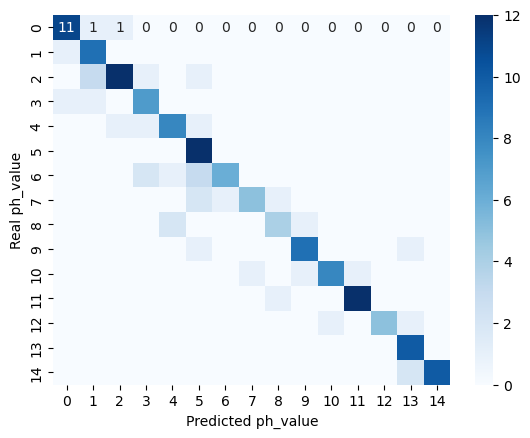

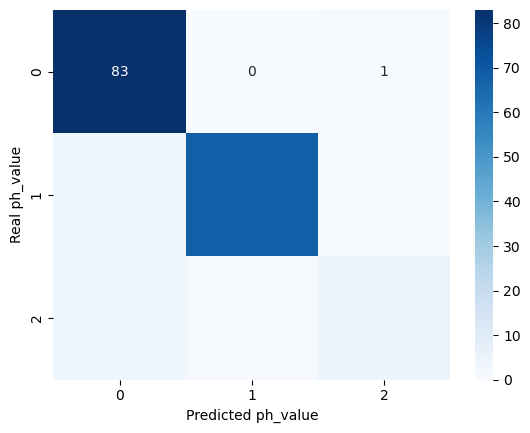

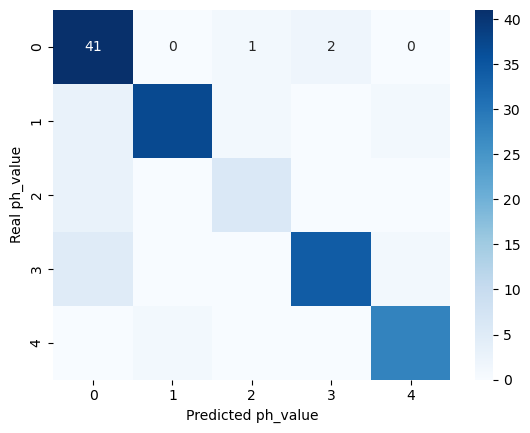

In [24]:
print_matrix(y_test_1, y_pred_1)
print_matrix(y_test_2, y_pred_2)
print_matrix(y_test_3, y_pred_3)

In [25]:
print(classification_report(y_test_1, y_pred_1))
print(classification_report(y_test_2, y_pred_2, target_names=df.acidity_3_group.unique()))
print(classification_report(y_test_3, y_pred_3, target_names=df.acidity_5_group.unique()))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.64      0.90      0.75        10
           2       0.86      0.71      0.77        17
           3       0.64      0.78      0.70         9
           4       0.73      0.73      0.73        11
           5       0.60      1.00      0.75        12
           6       0.86      0.50      0.63        12
           7       0.83      0.56      0.67         9
           8       0.67      0.57      0.62         7
           9       0.82      0.82      0.82        11
          10       0.89      0.73      0.80        11
          11       0.92      0.92      0.92        13
          12       1.00      0.71      0.83         7
          13       0.71      1.00      0.83        10
          14       1.00      0.83      0.91        12

    accuracy                           0.78       164
   macro avg       0.80      0.77      0.77       164
weighted avg       0.81   

In [26]:
def roc_auc_score_summary(model, X_test, y_test):
    y_preb_probs = model.predict_proba(X_test)
    roc_auc_score_for_model = round(roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr"), 3)
    count_of_classes = len(y_test.unique())
    print('ROC_AUC_score of model with', count_of_classes, 'classes =', roc_auc_score_for_model)
    return 
roc_auc_score_summary(best_model1, X_test, y_test_1)
roc_auc_score_summary(best_model2, X_test, y_test_2)
roc_auc_score_summary(best_model3, X_test, y_test_3)

ROC_AUC_score of model with 15 classes = 0.945
ROC_AUC_score of model with 3 classes = 0.977
ROC_AUC_score of model with 5 classes = 0.969


In [27]:
import joblib
joblib.dump(best_model2, 'Ph prediction model.pkl')

['Ph prediction model.pkl']

In [28]:
import gradio as gr
import cv2
import numpy as np
import joblib

# Load the trained model
rf_model = joblib.load('Ph prediction model.pkl')

def predict_ph(image):

    if image is not None and len(image.shape) == 3:
        # Calculate average RGB values
        
        average_color = np.mean(image, axis=(0, 1))

        # Reshape the average RGB values for prediction
        input_rgb = average_color.reshape(1, -1)

        # Predict pH values using the trained model
        ph_prediction_rf = rf_model.predict(input_rgb)

        return f"The pH of Your urine sample is: {ph_prediction_rf[0]}\n"
    else:
        return "Error: Your image is not supported by our system!!\n"

iface = gr.Interface(
    fn=predict_ph,
    inputs="image",
    outputs="text",
    live=True,
    title='Urine PH Detector', 
)
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7864
Running on public URL: https://55b9f22c3ce0beb2b5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
